In [1]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size = 1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size = 1500)
lat_lngs = zip(lats,lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [4]:
# Import citipy
from citipy import citipy

# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.

len(cities)

610

In [5]:
#Import the dependencies
import requests
# Import API key
from config import weather_api_key

In [6]:
# Build basic URL with API key
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [7]:
# Import the datetime module from the datetime library
from datetime import datetime

In [8]:
#Create an empty list to hold the weather data
city_data = []
# Print the beginning of the logging
print("Beginning Data Retrieval.    ")
print("-----------------------------")

#Create counters
record_count = 1
set_count = 1

#Loop through all of the cities in our list
for i, city in enumerate(cities):
    
    #Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    #Create an endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ", "+")
    
    #Log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count
    record_count += 1
    
# Run an API request for each of the cities
    try:  
        #Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval.    
-----------------------------
Processing Record 1 of Set 1 | saint-francois
Processing Record 2 of Set 1 | cabo san lucas
Processing Record 3 of Set 1 | yellowknife
Processing Record 4 of Set 1 | walvis bay
Processing Record 5 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 6 of Set 1 | juru
Processing Record 7 of Set 1 | umzimvubu
City not found. Skipping...
Processing Record 8 of Set 1 | sitka
Processing Record 9 of Set 1 | kapaa
Processing Record 10 of Set 1 | qaanaaq
Processing Record 11 of Set 1 | sept-iles
Processing Record 12 of Set 1 | punta arenas
Processing Record 13 of Set 1 | east london
Processing Record 14 of Set 1 | saint-philippe
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | bluff
Processing Record 17 of Set 1 | vaini
Processing Record 18 of Set 1 | torbay
Processing Record 19 of Set 1 | hermanus
Processing Record 20 of Set 1 | airai
Processing Record 21 of Set 1 | nikolskoye
Processing Record 22

In [9]:
len(city_data)

566

In [10]:
#Convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Saint-Francois,46.4154,3.9054,62.04,85,0,0.00,FR,2021-07-21 22:50:21
1,Cabo San Lucas,22.8909,-109.9124,97.81,63,28,11.52,MX,2021-07-21 22:48:41
2,Yellowknife,62.4560,-114.3525,71.33,60,75,11.50,CA,2021-07-21 22:50:21
3,Walvis Bay,-22.9575,14.5053,54.09,81,0,5.75,NA,2021-07-21 22:50:21
4,Juru,5.3120,100.4423,82.90,88,20,3.44,MY,2021-07-21 22:50:22
5,Sitka,57.0531,-135.3300,57.09,82,75,4.61,US,2021-07-21 22:50:22
6,Kapaa,22.0752,-159.3190,82.38,80,75,3.00,US,2021-07-21 22:50:23
7,Qaanaaq,77.4840,-69.3632,38.17,99,100,11.92,GL,2021-07-21 22:50:23
8,Sept-Iles,50.2001,-66.3821,66.72,64,90,1.01,CA,2021-07-21 22:50:23
9,Punta Arenas,-53.1500,-70.9167,37.51,87,90,11.50,CL,2021-07-21 22:45:50


In [11]:
# Reorder columns of DataFrame
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]

city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Saint-Francois,FR,2021-07-21 22:50:21,46.4154,3.9054,62.04,85,0,0.00
1,Cabo San Lucas,MX,2021-07-21 22:48:41,22.8909,-109.9124,97.81,63,28,11.52
2,Yellowknife,CA,2021-07-21 22:50:21,62.4560,-114.3525,71.33,60,75,11.50
3,Walvis Bay,NA,2021-07-21 22:50:21,-22.9575,14.5053,54.09,81,0,5.75
4,Juru,MY,2021-07-21 22:50:22,5.3120,100.4423,82.90,88,20,3.44
5,Sitka,US,2021-07-21 22:50:22,57.0531,-135.3300,57.09,82,75,4.61
6,Kapaa,US,2021-07-21 22:50:23,22.0752,-159.3190,82.38,80,75,3.00
7,Qaanaaq,GL,2021-07-21 22:50:23,77.4840,-69.3632,38.17,99,100,11.92
8,Sept-Iles,CA,2021-07-21 22:50:23,50.2001,-66.3821,66.72,64,90,1.01
9,Punta Arenas,CL,2021-07-21 22:45:50,-53.1500,-70.9167,37.51,87,90,11.50


In [12]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV file
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

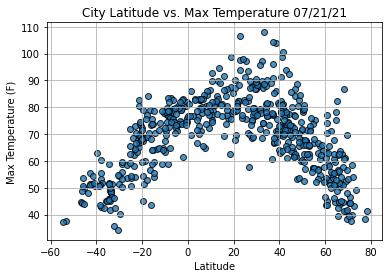

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

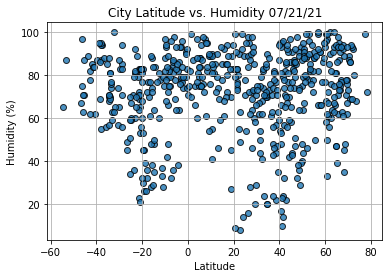

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

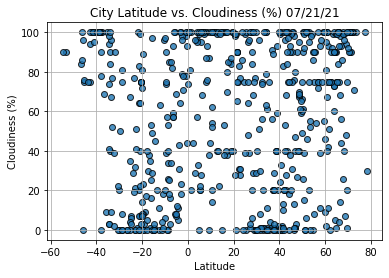

In [18]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats,
            cloudiness,
            edgecolors="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("weather_data/Fig3.png")
#Show plot
plt.show()

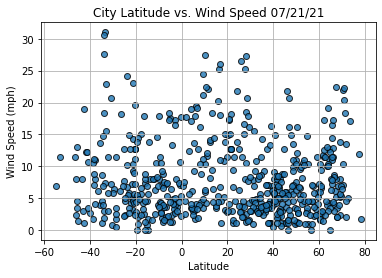

In [19]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats,
            wind_speed,
            edgecolors="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("weather_data/Fig4.png")
#Show plot
plt.show()